# K-MEANS CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns={'Gender':'gender' , 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [6]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.shape

(200, 5)

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


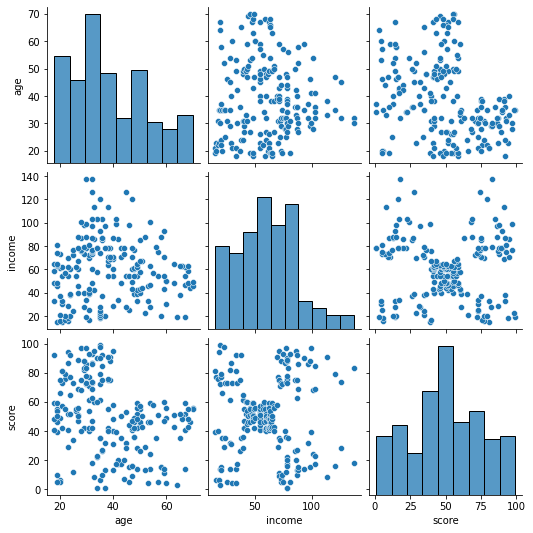

In [11]:
seaborn.pairplot(df[['age','income','score']])

In [12]:
import sklearn.cluster as cluster

In [13]:
kmeans = cluster.KMeans(n_clusters = 5)

In [15]:
kmeans = kmeans.fit(df[['income','score']])

In [17]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

In [19]:
df['income cluster'] = kmeans.labels_

In [20]:
df

,CustomerID,gender,age,income,score,income cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [24]:
df['income cluster'].value_counts()

3    81
1    39
0    35
2    23
4    22
Name: income cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

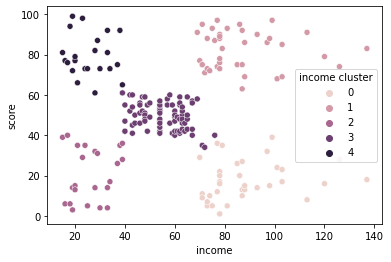

In [25]:
seaborn.scatterplot(x = 'income', y = 'score', hue = 'income cluster', data = df)

In [26]:
kmeans = cluster.KMeans(n_clusters = 2)

In [27]:
kmeans = kmeans.fit(df[['age','score']])

In [30]:
df['age cluster'] = kmeans.labels_

In [31]:
df['age cluster'].value_counts()

1    115
0     85
Name: age cluster, dtype: int64

In [32]:
df

,CustomerID,gender,age,income,score,income cluster,score cluster,age cluster
0,1,Male,19,15,39,1,2,1
1,2,Male,21,15,81,0,4,0
2,3,Female,20,16,6,1,2,1
3,4,Female,23,16,77,0,4,0
4,5,Female,31,17,40,1,2,1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1,0
196,197,Female,45,126,28,1,0,1
197,198,Male,32,126,74,0,1,0
198,199,Male,32,137,18,1,0,1


<AxesSubplot:xlabel='age', ylabel='score'>

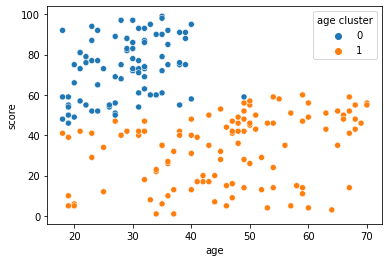

In [33]:
seaborn.scatterplot(x = 'age', y = 'score', hue = 'age cluster', data = df)